In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

In [2]:
t3d = torch.rand(10, 5, 3)
t3d_mean = torch.mean(t3d)

In [3]:
#we should use PyTorch's benchmark module, because it automatically synchronizes CUDA when benchmarking on the GPU
import torch.utils.benchmark as benchmark

gpu = torch.device("cuda")

log2_sizes = range(1, 13)
results = []
cpu_times = []
gpu_times = []

for i in log2_sizes:
    print(i)
    x = torch.rand(2**i, 2**i, dtype=torch.float32)
    x_cpu = x.cpu()
    b_cpu = benchmark.Timer(stmt="x_cpu@x_cpu", globals = {"x_cpu": x_cpu}, label="CPU", sub_label=f"Size: {2**i}", description="Matrix multiply")
    r_cpu = b_cpu.blocked_autorange()
    x_gpu = x.to(gpu)
    b_gpu = benchmark.Timer(stmt="x_gpu@x_gpu", globals = {"x_gpu": x_gpu}, label="GPU", sub_label=f"Size: {2**i}", description="Matrix multiply")
    r_gpu = b_gpu.blocked_autorange()
    results.append(r_cpu)
    results.append(r_gpu)
    cpu_times.append(r_cpu.median)
    gpu_times.append(r_gpu.median)

compare = benchmark.Compare(results)
compare.print()

1
2
3
4
5
6
7
8
9
10
11
12
[-------------- CPU ---------------]
                  |  Matrix multiply
1 threads: -------------------------
      Size: 2     |           1.8   
      Size: 4     |           1.9   
      Size: 8     |           1.9   
      Size: 16    |           2.2   
      Size: 32    |           4.0   
      Size: 64    |          15.3   
      Size: 128   |         116.4   
      Size: 256   |         872.8   
      Size: 512   |        6902.2   
      Size: 1024  |       55973.9   
      Size: 2048  |      452000.7   
      Size: 4096  |     3599124.6   

Times are in microseconds (us).

[-------------- GPU ---------------]
                  |  Matrix multiply
1 threads: -------------------------
      Size: 2     |         32.1    
      Size: 4     |         16.1    
      Size: 8     |         16.5    
      Size: 16    |         16.6    
      Size: 32    |         16.3    
      Size: 64    |         15.9    
      Size: 128   |         15.9    
      Size: 25

Text(0, 0.5, 't (us)')

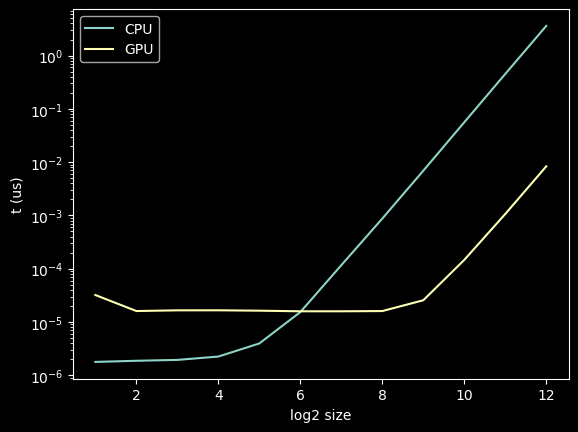

In [4]:
fig = plt.figure()
ax = fig.subplots()
cpu_line = ax.plot(log2_sizes, cpu_times, label = "CPU")
gpu_line = ax.plot(log2_sizes, gpu_times, label = "GPU")
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('log2 size')
ax.set_ylabel('t (us)')

In [ ]:
#we need all math operators to come from PyTorch, not NumPy. otherwise, the
#gradients will not be tracked! this is obvious: while NumPy operators accept
#Tensor inputs, they do not compute gradients. the converse is not true: PyTorch
#operators require Tensors, not NumPy arrays
from torch import sin, cos, pow, exp, sqrt, abs

tensor([6.9367])


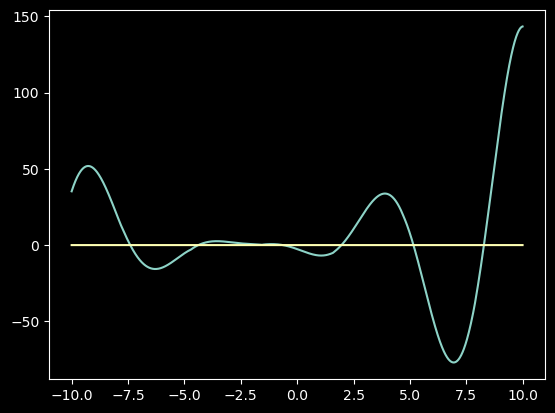

In [42]:
def f1(x):
    return sin(x-2) * pow(x + 2, 2) + sqrt(abs(cos(x)))

x_range = torch.from_numpy(np.arange(-10, 10, 0.01))
y_range = f1(x_range)
plt.plot(x_range, y_range)
plt.plot(x_range, torch.zeros_like(x_range))

#define the independent variable as a PyTorch parameter, and ask PyTorch to track the
#gradient of f with respect to it
eta = 0.02
x1_0 = 5.0 #-2.5, -7.5
x1_param = torch.nn.Parameter(torch.tensor([x1_0]), requires_grad = True)
optimizer = torch.optim.SGD([x1_param], lr = eta)

for epoch in range(60):
    optimizer.zero_grad() #reset the gradients stored in the parameters
    loss = f1(x1_param)
    loss.backward()
    optimizer.step()

print(x1_param.data)


tensor([2.1594]) tensor([8.0402])
tensor([3.3389]) tensor([6.8660])
tensor([4.0364]) tensor([6.1653])
tensor([4.3845]) tensor([5.7776])
tensor([4.4049]) tensor([5.6803])
tensor([4.3329]) tensor([5.6643])
tensor([4.3064]) tensor([5.5988])
tensor([4.2484]) tensor([5.5558])
tensor([4.2065]) tensor([5.4934])
tensor([4.1521]) tensor([5.4377])
tensor([4.1047]) tensor([5.3735])
tensor([4.0521]) tensor([5.3119])
tensor([4.0035]) tensor([5.2466])
tensor([3.9531]) tensor([5.1832])
tensor([3.9056]) tensor([5.1190])
tensor([3.8581]) tensor([5.0570])
tensor([3.8131]) tensor([4.9959])
tensor([3.7691]) tensor([4.9374])
tensor([3.7274]) tensor([4.8808])
tensor([3.6871]) tensor([4.8270])
tensor([3.6490]) tensor([4.7758])
tensor([3.6126]) tensor([4.7275])
tensor([3.5783]) tensor([4.6818])
tensor([3.5457]) tensor([4.6391])
tensor([3.5152]) tensor([4.5990])
tensor([3.4864]) tensor([4.5617])
tensor([3.4595]) tensor([4.5270])
tensor([3.4342]) tensor([4.4948])
tensor([3.4107]) tensor([4.4649])
tensor([3.3888

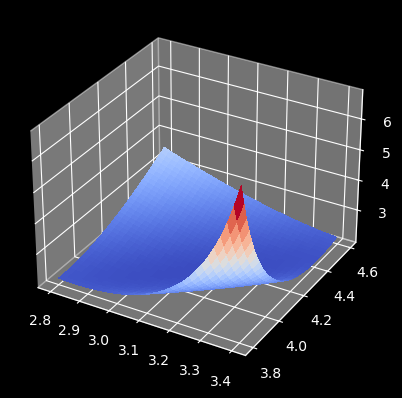

In [69]:
def f2(x, y):
    return exp(sin(x)**2)/(x-y)**2 + (x-y)**2

f2(torch.tensor(0.0), torch.tensor(0.0))

from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(2.8, 3.4, 0.01)
Y = np.arange(4.0, 4.6, 0.01)
X, Y = np.meshgrid(X, Y)
X = torch.from_numpy(X)
Y = torch.from_numpy(Y)
Z = f2(X, Y)
surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth=0, antialiased=False)

#define the independent variable as a PyTorch parameter, and ask PyTorch to track the
#gradient of f with respect to it
eta = 0.1
x2_0 = 0.2
y2_0 = 10.0
x2_param = torch.nn.Parameter(torch.tensor([x2_0]), requires_grad = True)
y2_param = torch.nn.Parameter(torch.tensor([y2_0]), requires_grad = True)
optimizer = torch.optim.SGD([x2_param, y2_param], lr = eta)

for epoch in range(100):
    optimizer.zero_grad() #reset the gradients stored in the parameters
    loss = f2(x2_param, y2_param)
    loss.backward()
    optimizer.step()
    print(x2_param.data, y2_param.data)




Next: Write MNIST to a memmap.
Why is this useful? It may be the case that the whole dataset is too large to fit in RAM. What we do is:
1. Determine its size in advance.
2. Allocate a memmap of such size on the disk.
3. Download the examples from the dataset individually or by batches, and write them sequentially to the memmap
4. To use it, open the memmap, which should then work as a numpy array
<!-- 
Next: Create a Dataset from the CIFAR10 dataset. Inspect the images. Experiment with torchvision transforms. -->